# Calcula el error entre experimental y casos
* Compara los archivos procesados C_ae.csv, C_bm.csv, C_za.csv con  Ti  de experimento.csv

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
import numpy as np

In [5]:
exp = pd.read_csv('../data/002_processed/experimento.csv',index_col=0,parse_dates=True)
exp.index

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 00:10:00',
               '2019-01-01 00:20:00', '2019-01-01 00:30:00',
               '2019-01-01 00:40:00', '2019-01-01 00:50:00',
               '2019-01-01 01:00:00', '2019-01-01 01:10:00',
               '2019-01-01 01:20:00', '2019-01-01 01:30:00',
               ...
               '2019-07-29 08:50:00', '2019-07-29 09:00:00',
               '2019-07-29 09:10:00', '2019-07-29 09:20:00',
               '2019-07-29 09:30:00', '2019-07-29 09:40:00',
               '2019-07-29 09:50:00', '2019-07-29 10:00:00',
               '2019-07-29 10:10:00', '2019-07-29 10:20:00'],
              dtype='datetime64[ns]', name='tiempo', length=30159, freq=None)

In [6]:
exp.columns

Index(['To_ruoa', 'hr_ruoa', 'ws_ruoa', 'wd_ruoa', 'Ig_ruoa', 'SFlujo',
       'TemPrtdIn', 'TemPrtdOut', 'TCPan1', 'TCPan2', 'TCPan3', 'TCPan4',
       'TCPan5', 'TCCubo01', 'TCCubo02', 'TCCubo03', 'TCCubo04', 'TCCubo05',
       'TCCubo06', 'TCCubo07', 'TCCubo08', 'TCCubo09', 'TCCubo010', 'TCPiso',
       'Ti', 'A1', 'A2', 'A3', 'A4', 'Flujo2', 'TemPrtdIn2', 'TemPrtdOut2',
       'InterIn', 'InterOut'],
      dtype='object')

<AxesSubplot:xlabel='tiempo'>

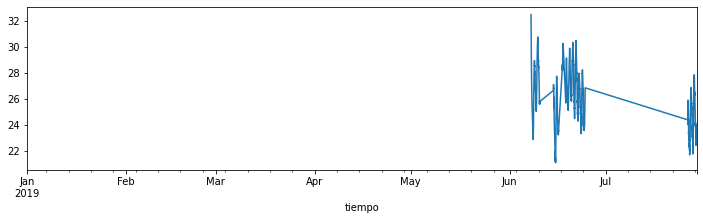

In [7]:
exp.Ti.plot(figsize=(12,3))

In [8]:
za = pd.read_csv("../data/002_processed/C_za.csv",index_col=0,parse_dates=True)
za.columns

Index(['To', 'hr', 'ws', 'wd', 'Id', 'Ib', 'alpha', 'Ti',
       'CR:AFN Zone Infiltration Air Change Rate [ach](Hourly)'],
      dtype='object')

In [9]:
ae = pd.read_csv("../data/002_processed/C_ae.csv",index_col=0,parse_dates=True)
ae.columns

Index(['To', 'hr',
       'Environment:Site Outdoor Air Barometric Pressure [Pa](TimeStep)', 'ws',
       'wd', 'Id', 'Ib', 'alpha',
       'C_ROJAS:Zone Electric Equipment Electric Power [W](TimeStep)',
       'C_ROJAS:Zone Electric Equipment Total Heating Rate [W](TimeStep)',
       'C_1:Zone Mean Air Temperature [C](TimeStep)',
       'C_2:Zone Mean Air Temperature [C](TimeStep)', 'Ti',
       'T_1:Zone Mean Air Temperature [C](TimeStep)',
       'T_2:Zone Mean Air Temperature [C](TimeStep)',
       'T_ROJAS:Zone Mean Air Temperature [C](TimeStep)'],
      dtype='object')

In [10]:
bm = pd.read_csv("../data/002_processed/C_bm.csv",index_col=0,parse_dates=True)
bm.columns

Index(['To', 'hr',
       'Environment:Site Outdoor Air Barometric Pressure [Pa](TimeStep)', 'ws',
       'wd', 'Id', 'Ib', 'alpha', 'Ti'],
      dtype='object')

# Gr'aficas

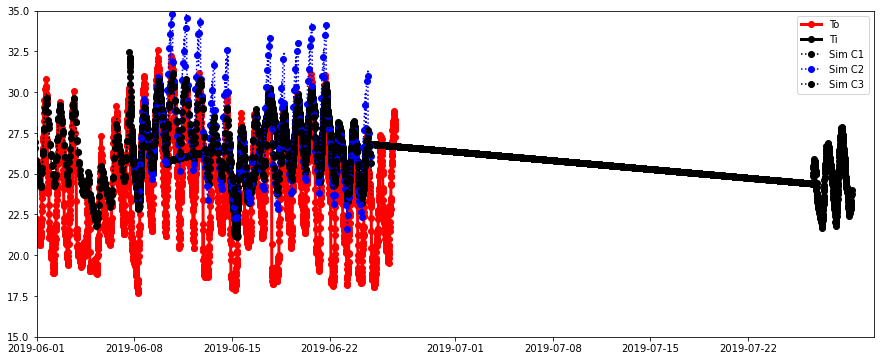

In [11]:
fig, ax  = plt.subplots(figsize=(15,6),sharex=True)
fecha1 = parse("2019-06-01")
fecha2 = fecha1 + pd.Timedelta("60D")

ax.set_xlim(fecha1,fecha2)
ax.set_ylim(15,35)

ax.plot(exp.To_ruoa,   'ro-',lw=3,label='To')
ax.plot(exp.Ti,        'ko-',lw=3,label='Ti')


ax.plot(za.Ti,'ko:',label="Sim C1",markevery=10)
ax.plot(ae.Ti,'bo:',label="Sim C2",markevery=10)
ax.plot(bm.Ti,'ko:',label="Sim C3",markevery=10)

ax.legend()

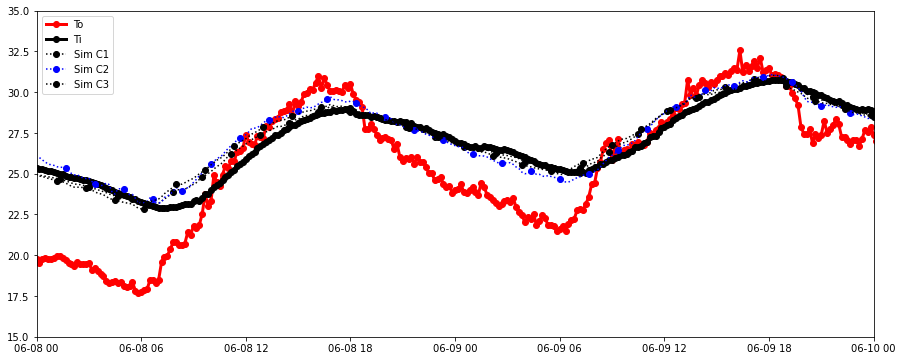

In [12]:
fig, ax  = plt.subplots(figsize=(15,6),sharex=True)
fecha1 = parse("2019-06-08")
fecha2 = fecha1 + pd.Timedelta("2D")

ax.set_xlim(fecha1,fecha2)
ax.set_ylim(15,35)

ax.plot(exp.To_ruoa,   'ro-',lw=3,label='To')
ax.plot(exp.Ti,        'ko-',lw=3,label='Ti')


ax.plot(za.Ti,'ko:',label="Sim C1",markevery=10)
ax.plot(ae.Ti,'bo:',label="Sim C2",markevery=10)
ax.plot(bm.Ti,'ko:',label="Sim C3",markevery=10)

ax.legend()

# Define rango donde calcular error

In [49]:
exp_fechas = exp.loc[fecha1:fecha2]
za_fechas  = za.loc[fecha1:fecha2]
ae_fechas  = ae.loc[fecha1:fecha2]
bm_fechas  = bm.loc[fecha1:fecha2]
# exp_fechas.Ti.plot()

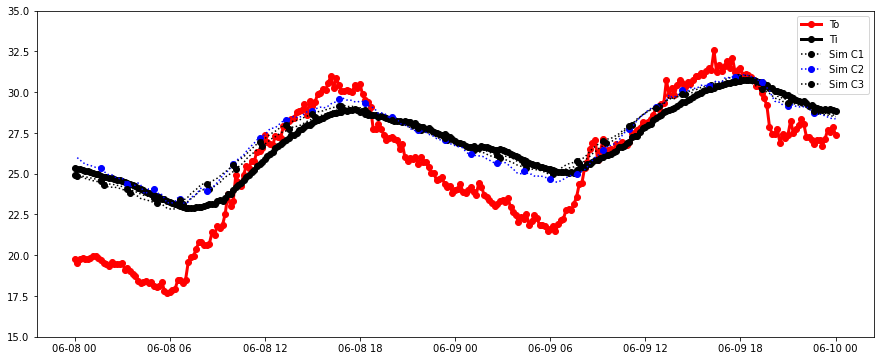

In [14]:
fig, ax  = plt.subplots(figsize=(15,6),sharex=True)

ax.set_ylim(15,35)

ax.plot(exp_fechas.To_ruoa,   'ro-',lw=3,label='To')
ax.plot(exp_fechas.Ti,        'ko-',lw=3,label='Ti')


ax.plot(za_fechas.Ti,'ko:',label="Sim C1",markevery=10)
ax.plot(ae_fechas.Ti,'bo:',label="Sim C2",markevery=10)
ax.plot(bm_fechas.Ti,'ko:',label="Sim C3",markevery=10)

ax.legend()

In [15]:
exp_fechas.Ti - za_fechas.Ti

tiempo
2019-06-08 00:00:00         NaN
2019-06-08 00:10:00    0.450064
2019-06-08 00:20:00    0.454897
2019-06-08 00:30:00    0.450213
2019-06-08 00:40:00    0.474862
                         ...   
2019-06-09 23:30:00    0.236748
2019-06-09 23:40:00    0.340648
2019-06-09 23:50:00    0.326752
2019-06-09 23:59:59         NaN
2019-06-10 00:00:00         NaN
Name: Ti, Length: 291, dtype: float64

<AxesSubplot:xlabel='tiempo'>

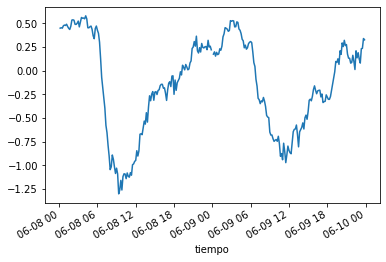

In [16]:
(exp_fechas.Ti - za_fechas.Ti).plot()

In [17]:
(exp_fechas.Ti - za_fechas.Ti).mean()

-0.1357131505223668

In [18]:

(abs(exp_fechas.Ti - za_fechas.Ti)).mean()

0.42683693784383053

In [52]:
za_fechas  =  za_fechas.add_suffix('_za')
ae_fechas  =  ae_fechas.add_suffix('_ae')
bm_fechas  =  bm_fechas.add_suffix('_bm')
exp_fechas = exp_fechas.add_suffix('_exp')

In [55]:
todos = pd.concat([exp_fechas.Ti_exp,
                   za_fechas.Ti_za,
                   ae_fechas.Ti_ae,
                   bm_fechas.Ti_bm],axis=1)

In [58]:
todos

,Ti_exp,Ti_za,Ti_ae,Ti_bm
tiempo,,,,
2019-06-08 00:00:00,25.348056,NaN,NaN,24.947862
2019-06-08 00:10:00,25.311138,24.861074,25.987106,24.896703
2019-06-08 00:20:00,25.274220,24.819322,25.843582,24.883444
2019-06-08 00:30:00,25.228072,24.777858,25.720011,24.848257
2019-06-08 00:40:00,25.187692,24.712830,25.588698,24.807729
...,...,...,...,...
2019-06-09 23:30:00,28.933756,28.697008,28.480575,28.596118
2019-06-09 23:40:00,28.982211,28.641564,28.391972,28.560592
2019-06-09 23:50:00,28.937217,28.610465,28.400769,28.524514
